In [49]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib as plot

In [50]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [51]:
# Read the database (pre_covid contains)
pre_covid_df = pd.read_csv("pre_covid.csv",index_col="Date")
pre_covid_df.head()

,Unnamed: 0,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,CPI
Date,,,,,,,,,,,,,,,
1995-01,0,1.13000,1.1072,1.22820,1.08180,1.06620,1.16640,1.17360,1.16120,1.29680,1.27480,1.25320,1.38120,1.09820,147.0
1995-02,1,1.12025,1.0990,1.21500,1.07250,1.05800,1.15550,1.16475,1.15275,1.28225,1.26475,1.24450,1.36500,1.08775,147.7
1995-03,2,1.11850,1.0990,1.20250,1.07200,1.05925,1.14200,1.16125,1.15225,1.26875,1.25800,1.23975,1.35275,1.08750,147.1
1995-04,3,1.15725,1.1430,1.21275,1.11125,1.10350,1.15625,1.19875,1.19450,1.27700,1.29475,1.28325,1.36125,1.10400,148.7
1995-05,4,1.22520,1.2128,1.27040,1.17840,1.17240,1.21600,1.26840,1.26620,1.33160,1.36420,1.35680,1.41580,1.12500,148.7


In [37]:
# Drop the unnamed row
pre_covid_df.drop(pre_covid_df.columns[[0]], axis=1, inplace=True)

In [52]:
pre_covid_df.head()

,Unnamed: 0,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,CPI
Date,,,,,,,,,,,,,,,
1995-01,0,1.13000,1.1072,1.22820,1.08180,1.06620,1.16640,1.17360,1.16120,1.29680,1.27480,1.25320,1.38120,1.09820,147.0
1995-02,1,1.12025,1.0990,1.21500,1.07250,1.05800,1.15550,1.16475,1.15275,1.28225,1.26475,1.24450,1.36500,1.08775,147.7
1995-03,2,1.11850,1.0990,1.20250,1.07200,1.05925,1.14200,1.16125,1.15225,1.26875,1.25800,1.23975,1.35275,1.08750,147.1
1995-04,3,1.15725,1.1430,1.21275,1.11125,1.10350,1.15625,1.19875,1.19450,1.27700,1.29475,1.28325,1.36125,1.10400,148.7
1995-05,4,1.22520,1.2128,1.27040,1.17840,1.17240,1.21600,1.26840,1.26620,1.33160,1.36420,1.35680,1.41580,1.12500,148.7


In [55]:
# Set up the dataframe frequency as monthly
pre_covid_df=pre_covid_df.asfreq("M")
pre_covid_df.index

DatetimeIndex(['1995-01-31', '1995-02-28', '1995-03-31', '1995-04-30',
               '1995-05-31', '1995-06-30', '1995-07-31', '1995-08-31',
               '1995-09-30', '1995-10-31',
               ...
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31'],
              dtype='datetime64[ns]', name='Date', length=289, freq='M')

In [56]:
# Cerate/train the model
model = ExponentialSmoothing(endog=pre_covid_df["A1"]).fit()
model

In [46]:
# Predit/forecast for 29 months
predictions= model.forecast(20)

In [57]:
# The predictions should have a column of numbers noy NaN.. need figure out why
predictions

2022-07-31   NaN
2022-08-31   NaN
2022-09-30   NaN
2022-10-31   NaN
2022-11-30   NaN
2022-12-31   NaN
2023-01-31   NaN
2023-02-28   NaN
2023-03-31   NaN
2023-04-30   NaN
2023-05-31   NaN
2023-06-30   NaN
2023-07-31   NaN
2023-08-31   NaN
2023-09-30   NaN
2023-10-31   NaN
2023-11-30   NaN
2023-12-31   NaN
2024-01-31   NaN
2024-02-29   NaN
Freq: M, dtype: float64

<AxesSubplot:xlabel='Date'>

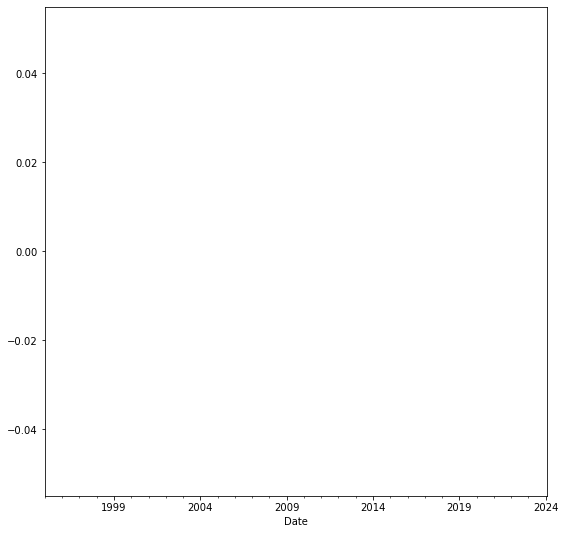

In [58]:
# Plot out the data with the predictions
pre_covid_df["A1"].plot(figsize=(9,9))
predictions.plot()